In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, sys
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import LinearLocator

import numpy as np
import matplotlib.pyplot as plt

# Constants
X = 0  # Center of the Gaussian function
mu = 0.5  # Mean of the Gaussian function
t_T = 0.1  # Time step

# Generate data
x = np.linspace(-1.5, 1.5, 100)  # x-coordinates for the plot
d_0 = np.zeros_like(x)  # Initial topography
d_t = d_0.copy()  # Topography after erosion

# Calculate breach growth
for t in range(1, 11):  # Number of time steps
    d_t = d_t - np.exp(-0.5 * (x - mu) ** 2) * t_T

# Plot the schematic
fig, ax = plt.subplots()

# Plot initial topography
ax.plot(x, d_0, linestyle='--', color='k', label='Initial Topography')

# Plot final topography after erosion
ax.plot(x-0.5, d_t, color='b', label='Final Topography')

# Plot dashed line for mu
ax.axvline(x=mu-0.5, linestyle='--', color='r', label='mu')

# Plot total breach width
ax.annotate('', xy=(X - 0.5, -1.0), xytext=(X + 0.5, -1.0),
            arrowprops=dict(arrowstyle='<->', color='g'))
ax.text(X, -1.2, 'Total Width', ha='center', color='g')

# Plot dotted lines for top of the hill and 1 more time step
ax.plot(x, d_0 + t_T, linestyle=':', color='k', label='Top of Hill + 1 time step')
ax.plot(x, d_t + t_T, linestyle=':', color='b', label='Final Topography + 1 time step')

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('d')
ax.set_title('Barrier Island Breach Growth')

# Add legend
ax.legend()

# Display the plot
plt.show()


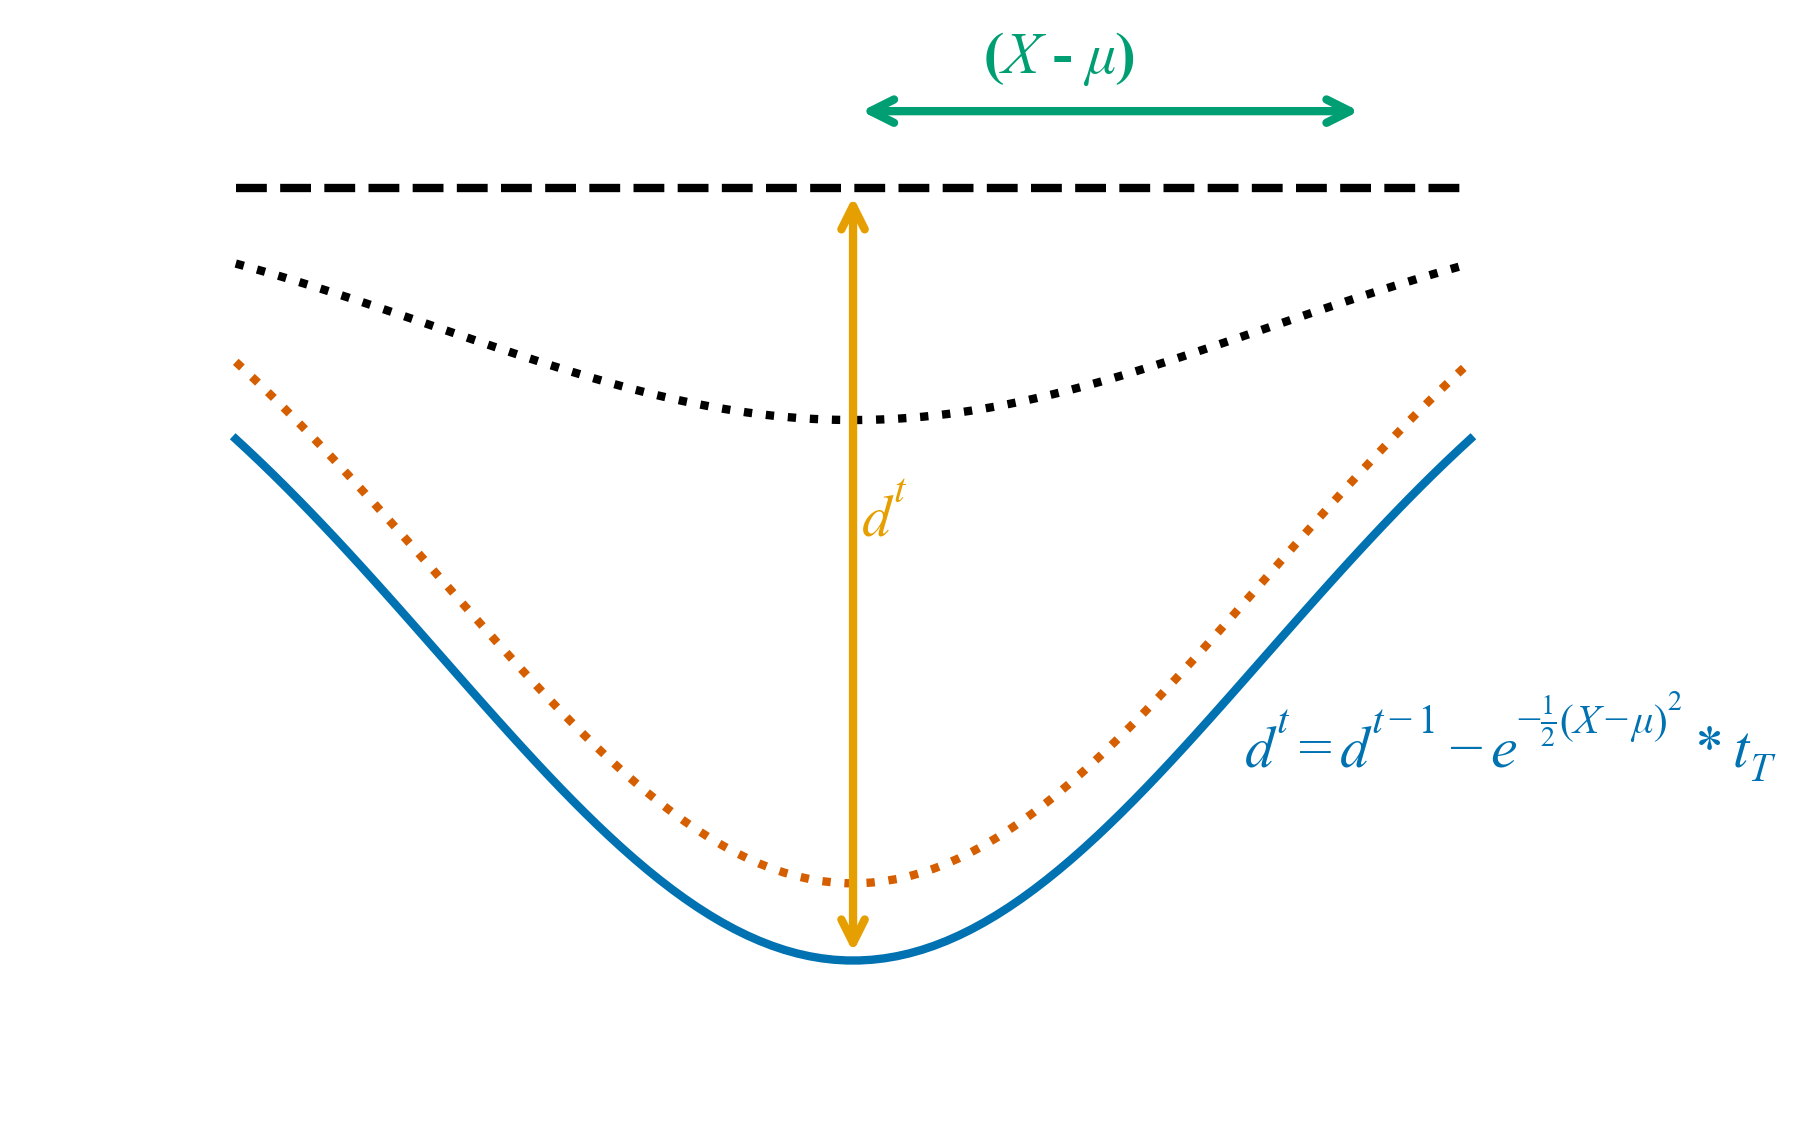

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./mystyle.mplstyle')
# mpl.use('pgf')

# Constants
X = 0.5  # Center of the Gaussian function
mu = 0.0  # Mean of the Gaussian function
t_T = 0.1  # Time step

# Generate data
x = np.linspace(-1.5, 1.5, 100)  # x-coordinates for the plot
d_0 = np.zeros_like(x)  # Initial topography
d_t = d_0.copy()  # Topography after erosion

# Calculate breach growth
for t in range(1, 11):  # Number of time steps
    d_t = d_t - np.exp(-0.5 * (x - mu) ** 2) * t_T
    if t == 3:
        d_t3 = d_t

# Plot the schematic
fig, ax = plt.subplots()
fig.set_figheight(4.68)
fig.set_figwidth(7.08)
# fig(figsize=(7.08, 7.08))

# Plot initial topography
ax.plot(x, d_0, linestyle='--', color='k', label='Initial Topography')

# Plot final topography after erosion
ax.plot(x, d_t, color='#0072B2', label='Final Topography')

# Calculate the minimum depth
min_depth = np.min(d_t)

# Plot total breach width
ax.annotate('', xy=(X - 0.5, 0.1), xytext=(X + 1.5/2, 0.1),
            arrowprops=dict(arrowstyle='<->', color='#009E73'), fontweight='bold')
ax.text(X, 0.15, r'($X$ - $\mu$)', ha='center', color='#009E73', fontweight='bold')

ax.annotate('', xy=(mu, 0), xytext=(0, min_depth),
            arrowprops=dict(arrowstyle='<->', color='#E69F00'), fontweight='bold')
ax.text(mu+0.02, -.45, r"$d^t$", color='#E69F00', fontweight='bold')

ax.text(X+.450, -0.75, r"$d^t = d^{t-1} - e^{-\frac{1}{2}{(X - \mu)^2}}*{t_T}$", color='#0072B2')
# Plot dotted lines for top of the hill and 1 more time step
ax.plot(x, d_t3, linestyle=':', color='k', label='Breach after 3 time-steps')
ax.plot(x, d_t + t_T, linestyle=':', color='#D55E00', label='Final Topography + 1 time step')

# Set axis labels and title
ax.set_xlabel('Distance alongshore (m)')
ax.set_ylabel('Height of Barrier Island (m)')
# ax.set_title('Barrier Island Breach Growth')
ax.axis('off')

ax.xaxis.set_major_locator(LinearLocator(8))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# Add legend
# ax.legend()

# Display the plot

plt.savefig(f'breach_schematic_transparent.pdf', bbox_inches='tight', transparent=False)
plt.show()
